# Numerical Calculus

Throughout this section and the next ones, we shall cover the topic of numerical calculus. Calculus has been identified since ancient times as a powerful toolkit for analysing and handling geometrical problems. Since differential calculus was developed by Newton and Leibniz (in its actual notation), many different applications have been found, at the point that most of the current science is founded on it (e.g. differential and integral equations). Due to the ever increasing complexity of analytical expressions used in physics and astronomy, their usage becomes more and more impractical, and numerical approaches are more than necessary when one wants to go deeper. This issue has been identified since long ago and many numerical techniques have been developed. We shall cover only the most basic schemes, but also providing a basis for more formal approaches.

- - -
- [Numerical Differentiation](#Numerical-Differentiation) 
    - [Example 1](#Example-1)
    - [(n+1)-point formula](#n+1-point-formula)
    - [Endpoint formulas](#Endpoint-formulas)
    - [Midpoint formulas](#Midpoint-formulas)
- [Numerical Integration](./numerical-calculus-integration.ipynb)    
- - -

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation
#Interpolation add-on
import scipy.interpolate as interp

Populating the interactive namespace from numpy and matplotlib


- - - 

# Numerical Differentiation

According to the formal definition of differentiation, given a function $f(x)$ such that $f(x)\in C^1[a,b]$, the first order derivative is given by

$$\frac{d}{dx}f(x) = f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

However, when $f(x)$ exhibits a complex form or is a numerical function (only a discrete set of points are known), this expression becomes unfeasible. In spite of this, this formula gives us a very first rough way to calculate numerical derivatives by taking a finite interval $h$, i.e.

$$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$

where the function must be known at least in $x_0$ and $x_1 = x_0+h$, and $h$ should be small enough.

## Example 1

Evaluate the first derivative of the next function using the previous numerical scheme at the point $x_0=2.0$ and using $h=0.5,\ 0.1,\  0.05$

$f(x) = \sqrt{1+\cos^2(x)}$

Compare with the real function and plot the tangent line using the found values of the slope.

In [7]:
import numpy as np

In [8]:
from scipy.misc import derivative

In [83]:
derivative?

It is used as:
```python
 derivative(func, x0, dx=1.0, n=1, args=(), order=3)
```
__Parameters__<br/>
`func` : function ->
    Input function.<br/>
`x0` : float -> 
    The point at which `n`-th derivative is found.<br/>
`dx` : float, optional -> 
    Spacing.<br/>
`n` : int, optional -> 
    Order of the derivative. Default is 1.<br/>
`args` : tuple, optional -> 
    Arguments<br/>
`order` : int, optional -> 
    Number of points to use, must be odd.<br/>


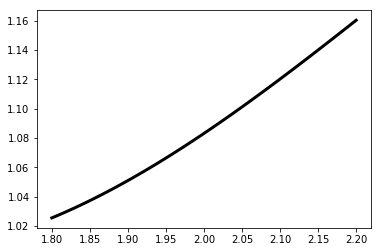

In [9]:
def function(x):
    return np.sqrt( 1+np.cos(x)**2 )

#X value
x0 = 2
xmin = 1.8
xmax = 2.2

X = np.linspace( xmin, xmax, 100 )

plt.plot( X, np.sqrt( 1+np.cos(X)**2 ), color="black", label="function", linewidth=3, zorder=10 )

We now check for the impact of the change of the spacing `dx`

In [10]:
derivative(function,2,dx=0.5)

0.27884081567829266

In [11]:
derivative(function,2,dx=0.1)

0.3462499420237386

In [12]:
derivative(function,2,dx=0.05)

0.34857854916349629

In [13]:
derivative(function,2,dx=1E-3)

0.34935758881293744

In [14]:
derivative(function,2,dx=1E-6)

0.34935790094170471

In [24]:
derivate(function,2,dx=1E-6)

0.34935790094170471

###  Implementation of the derivate of the function inside a full range
We now generalize the `derivative` function to allow the evaluation of the derivate in a full range of values. It will be designed like the evaluation in just one point alse be possible, such that can be used as a full replacement of `derivative` function.

First we introduce the `try` and `except` python progamming sctructure, wich is used to bypass one python error. For example a zero dimension array has not a shape attribute, so that the following error is generated:

In [84]:
nn=np.array(3).shape[0]

IndexError: tuple index out of range

To bypass that error we use the following code:

In [42]:
try: 
    nn=np.array(3).shape[0]
except IndexError:
    nn=-1

so that `nn` takes the values assigned in the `except` part:

In [43]:
nn

-1

A second ingridient is the `append` method of a Python list. It update the elements of the list without update explicitly the variable with some equal reasignment.

In [46]:
y=[]

In [47]:
y.append(2)

In [48]:
y

[2]

In [49]:
y.append(5)

In [50]:
y

[2, 5]

Let see now the implementation of the `derivate` function as full replacement of the `derivative` function:

In [51]:
def derivate(func,x0,dx=1,n=1,args=(),order=3):
    '''
    Same as scipy derivative but returbs the function if
    x0 is an array instead of a lota
    '''
    from scipy.misc import derivative
    try:
        nn=np.array(x0).shape[0]
    except IndexError:
        nn=-1
    if nn>-1:
        y=[]
        for xx in x0:
             y.append(derivative(func,xx,dx=dx,n=n,args=args,order=order))
                
        y=np.array(y)   
    else:
        y=derivative(func,x0,dx=dx,n=n,args=args,order=order)
        
    return y

Let us check the implementation with the previous function

In [52]:
func=lambda x: np.sqrt( 1+np.cos(x)**2 )

but now evaluated for a list of values

In [53]:
x=[1.8,2,2.2]
funcp=derivate(func,x,dx=1E-3)
funcp

array([ 0.21576117,  0.34935759,  0.41006125])

For the prevous `X` array:

In [54]:
X.shape

(100,)

We have:

In [55]:
derivate(func,X,dx=1E-3).shape

(100,)

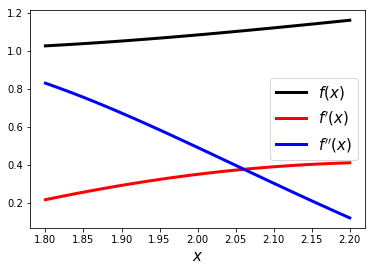

In [94]:
xmin = 1.8
xmax = 2.2

X = np.linspace( xmin, xmax, 100 )

plt.plot( X, np.sqrt( 1+np.cos(X)**2 ), color="black", label="$f(x)$", linewidth=3)
plt.plot( X, derivate(func,X,dx=1E-3), color="red", label="$f'(x)$", linewidth=3)
plt.plot( X, derivate(func,X,dx=1E-3,n=2), color="blue", label="$f''(x)$", linewidth=3)
plt.legend(loc='best',fontsize=15)
plt.xlabel('$x$',size=15)

Finally we check the function $f(x)=\cos x$ in the range $[0,2\pi]$

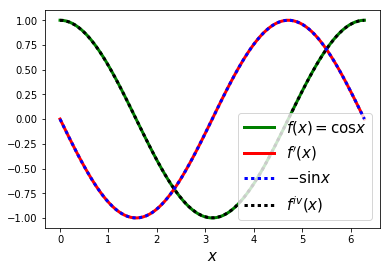

In [82]:
xmin = 0
xmax = 2*np.pi

X = np.linspace( xmin, xmax, 100 )

plt.plot( X, np.cos(X) , "g-", label="$f(x)=\cos x$", linewidth=3)
plt.plot( X, derivate(lambda x:np.cos(x),X,dx=1E-3), color="red", label="$f'(x)$", linewidth=3)
plt.plot( X, -np.sin(X) , 'b:', label="$-\sin x$", linewidth=3, zorder=10 )
plt.plot( X, derivate(lambda x:np.cos(x),X,dx=1E-3,n=4,order=5), 'k:', label="$f^{iv}(x)$", linewidth=3)
plt.legend(loc='best',fontsize=15)
plt.xlabel('$x$',size=15)

### One implementation of `derivative` algorithm

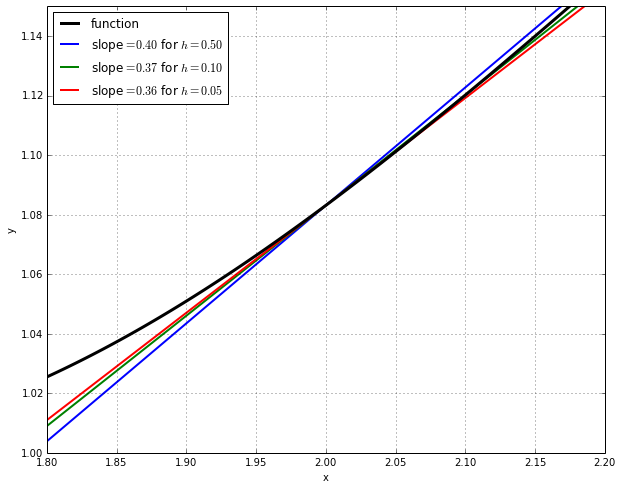

In [5]:
#Function to evaluate
def function(x):
    return np.sqrt( 1+np.cos(x)**2 )

#X value
x0 = 2
xmin = 1.8
xmax = 2.2
#h step
hs = [0.5,0.1,0.05]

#Calculating derivatives
dfs = []
for h in hs:
    dfs.append( (function(x0+h)-function(x0))/h )
    
#Plotting
plt.figure( figsize=(10,8) )
#X array
X = np.linspace( xmin, xmax, 100 )
Y = function(X)
plt.plot( X, Y, color="black", label="function", linewidth=3, zorder=10 )
#Slopes
Xslp = [1,x0,3]
Yslp = [0,0,0]
for df, h in zip(dfs, hs):
    #First point
    Yslp[0] = function(x0)+df*(Xslp[0]-Xslp[1])
    #Second point
    Yslp[1] = function(x0)
    #Third point
    Yslp[2] = function(x0)+df*(Xslp[2]-Xslp[1])
    #Plotting this slope
    plt.plot( Xslp, Yslp, linewidth = 2, label="slope$=%1.2f$ for $h=%1.2f$"%(df,h) )

#Format
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.xlim( xmin, xmax )
plt.ylim( 1, 1.15 )
plt.legend( loc = "upper left" )

## n+1-point formula

A generalization of the previous formula is given by the (n+1)-point formula, where first-order derivatives are calculated using more than one point, what makes it a much better approximation for many problems. it is controled by the `order` option of the `derivative` function of `scipy.misc`

**Theorem**

For a function $f(x)$ such that $f(x)\in C^{n+1}[a,b]$, the next expression is always satisfied

$$f(x) = P(x) + \frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)(x-x_1)\cdots(x-x_n)$$

where $\{x_i\}_i$ is a set of point where the function is mapped, $\xi(x)$ is some function of $x$ such that $\xi\in[a,b]$, and $P(x)$ is the associated Lagrange interpolant polynomial.

As $n$ becomes higher, the approximation should be better as the error term becomes neglectable.

Taking the previous expression, and differenciating, we obtain

$$f(x) = \sum_{k=0}^n f(x_k)L_{n,k}(x) + \frac{(x-x_0)(x-x_1)\cdots(x-x_n)}{(n+1)!}f^{(n+1)}(\xi(x))$$

$$f'(x_j) = \sum_{k=0}^n f(x_k)L'_{n,k}(x_j) + \frac{f^{(n+1)}(\xi(x_j))}{(n+1)!} \prod_{k=0,k\neq j}^{n}(x_j-x_k)$$

where $L_{n,k}$ is the $k$-th Lagrange basis functions for $n$ points, $L'_{n,k}$ is its first derivative.

Note that the last expressions is evaluated in $x_j$ rather than a general $x$ value, the cause of this is because this expression is not longer valid for another value not within the set $\{x_i\}_i$, however this is not an inconvenient when handling real applications.

This formula constitutes the **(n+1)-point approximation** and it comprises a generalization of almost all the existing schemes to differentiate numerically. Next, we shall derive some very used formulas.

For example, the form that takes this derivative polynomial for 3 points $(x_i,y_i)$ is the following

$$f'(x_j) = f(x_0)\left[ \frac{2x_j-x_1-x_2}{(x_0-x_1)(x_0-x_2)}\right] + 
f(x_1)\left[ \frac{2x_j-x_0-x_2}{(x_1-x_0)(x_1-x_2)}\right] +
f(x_2)\left[ \frac{2x_j-x_0-x_1}{(x_2-x_0)(x_2-x_1)}\right] $$ 
$$\hspace{2cm} + \frac{1}{6} f^{(3)}(\epsilon_j) \prod_{k=0,k\neq j}^{n}(x_j-x_k)$$

## Endpoint formulas

Endpoint formulas are based on evaluating the derivative at the first of a set of points, i.e., if we want to evaluate $f'(x)$ at $x_i$, we then need $(x_i$, $x_{i+1}=x_i+h$, $x_{i+2}=x_i+2h$, $\cdots)$. For the sake of simplicity, it is usually assumed that the set $\{x_i\}_i$ is equally spaced such that $x_k = x_0+k\cdot h$.

**Three-point Endpoint Formula**

$$f'(x_i) = \frac{1}{2h}[-3f(x_i)+4f(x_i+h)-f(x_i+2h)] + \frac{h^2}{3}f^{(3)}(\xi)$$

with $\xi\in[x_i,x_i+2h]$

**Five-point Endpoint Formula**

$$f'(x_i) = \frac{1}{12h}[-25f(x_i)+48f(x_i+h)-36f(x_i+2h)+16f(x_i+3h)-3f(x_i+4h)] + \frac{h^4}{5}f^{(5)}(\xi)$$

with $\xi\in[x_i,x_i+4h]$


Endpoint formulas are especially useful near to the end of a set of points, where no further points exist.

## Midpoint formulas

On the other hand, Midpoint formulas are based on evaluating the derivative at the middle of a set of points, i.e., if we want to evaluate $f'(x)$ at $x_i$, we then need $(\cdots$, $x_{i-2} = x_i - 2h$, $x_{i-1} = x_i - h$, $x_i$, $x_{i+1}=x_i+h$, $x_{i+2}=x_i+2h$, $\cdots)$.

**Three-point Midpoint Formula**

$$f'(x_i) = \frac{1}{2h}[f(x_i+h)-f(x_i-h)] + \frac{h^2}{6}f^{(3)}(\xi)$$

with $\xi\in[x_i-h,x_i+h]$

**Five-point Midpoint Formula**

$$f'(x_i) = \frac{1}{12h}[f(x_i-2h)-8f(x_i-h)+8f(x_i+h)-f(x_i+2h)] + \frac{h^4}{30}f^{(5)}(\xi)$$

with $\xi\in[x_i-2h,x_i+2h]$


As Midpoint formulas required one iteration less than Endpoint ones, they are more often used for numerical applications. Furthermore, the round-off error is smaller as well. However, near to the end of a set of points, they are no longer useful as no further points exists, and Endpoint formulas are preferable.

### Example: Heat transfer in a 1D bar 

Fourier's Law of thermal conduction describes the diffusion of heat. Situations in which there are gradients of heat, a flux that tends to homogenise the temperature arises as a consequence of collisions of particles within a body. The Fourier's Law is giving by 

$$ q = -k\nabla T = -k\left( \frac{dT}{dx}\hat{i} + \frac{dT}{dy}\hat{j} + \frac{dT}{dz}\hat{k}\right)$$

where T is the temperature, $\nabla T$ its gradient and k is the material's conductivity. In the next example it is shown the magnitud of the heat flux in a 1D bar(wire).

In [95]:
def Temp(x):
    return x**3 + 3*x-1

In [67]:
Xn = np.linspace(0,10,100)

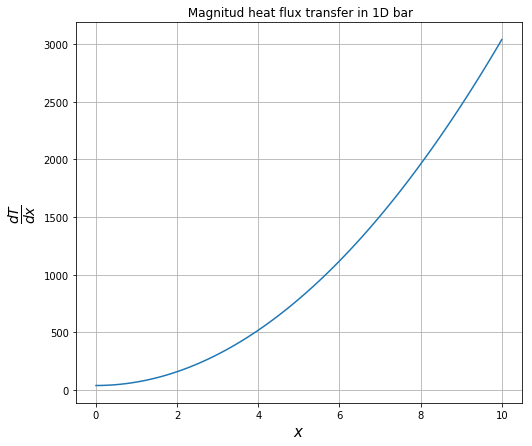

In [105]:
#Temperature profile 
def Temp(x):
    return x**3 + 3*x-1

# Points where function is known
Xn = np.linspace(0,10,100)

plt.figure( figsize=(8,7) )
plt.plot(Xn,derivate(Temp,Xn)*10)

plt.grid()
plt.xlabel( "$x$",fontsize =15 )
plt.ylabel( r"$\frac{dT}{dx}$",fontsize =20 )
plt.title( " Magnitud heat flux transfer in 1D bar" )

Custom implementation

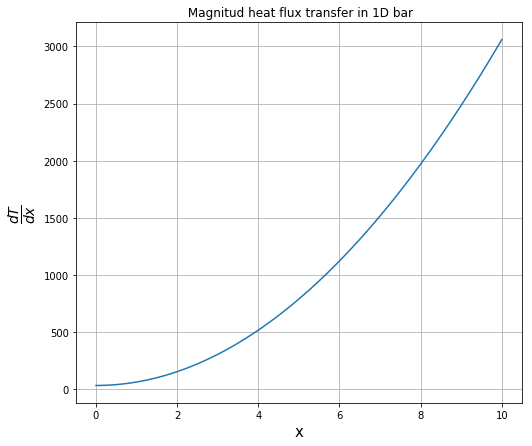

In [106]:
#Temperature profile 
def Temp(x):
    return x**3 + 3*x-1

#Derivative three end point 

def TEP( Yn,i, h=0.01,right=0 ):
    suma = -3*Yn[i]+4*Yn[i+(-1)**right*1]-Yn[i+(-1)**right*2]
    return suma/(2*h*(-1)**right)

#Derivative mid point 
def TMP( Ynh,Ynmh, h = 0.01 ):    
    return (Ynh-Ynmh)/(2*h)

# Points where function is known
Xn = np.linspace(0,10,100)
Tn = Temp(Xn)
#Magnitude of heat flux array
Q = np.zeros(len(Xn))
#Left end derivative
Q[0] = TEP(Tn,0)

#Mid point derivatives
index = len(Xn)-1
for i in xrange( 1,index ):    
    Q[i] =  TMP( Tn[i+1],Tn[i-1] )

#Right end derivative      
Q[-1] = TEP( Tn,index,right=1 ) 

#Plotting 
plt.figure( figsize=(8,7) )
plt.plot(Xn,Q)

plt.grid()
plt.xlabel( "x",fontsize =15 )
plt.ylabel( "$\\frac{dT}{dx}$",fontsize =20 )
plt.title( " Magnitud heat flux transfer in 1D bar" )

## <font color='red'>     **Activity** </font>

Construct a density map of the magnitud of the heat flux of a 2D bar. Consider the temperature profile as 
$$ T(x,y) = x^3 + 3x-1+y^2  $$

## <font color='red'>     **Activity** </font>

<font color='red'>    
The Poisson's equation relates the matter content of a body with the gravitational potential through the next equation
</font>

<font color='red'>    
$$\nabla^2 \phi = 4\pi G \rho$$
</font>

<font color='red'>    
$$\frac{1}{r^2}\frac{d}{dr}\left(r^2\frac{d\phi}{dr}\right)= 4\pi G \rho$$
</font>

<font color='red'>    
where $\phi$ is the potential, $\rho$ the density and $G$ the gravitational constant.
</font>

<font color='red'>    
Taking [these data](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/master/data/M1.00-STRUC.dat) and using the three-point Midpoint formula, find the density field from the potential (seventh column in the file) and plot it against the radial coordinate. (**Tip:** Use $G=1$)

</font>

## <font color='red'>     **Activity** </font>

The radar stations A and B, separated by the distance a = 500 m, track the plane
C by recording the angles $\alpha$ and $\beta$ at 1-second intervals. The successive readings are 

<img src="./figures/table.png">


calculate the speed v using the 3 point approximantion at t = 10 ,12 and 14 s. Calculate the x component of the acceleration of the plane at = 12 s. The coordinates of the plane can be shown to be

\begin{equation}
x = a\frac{\tan \beta}{\tan \beta- \tan \alpha}\\
y = a\frac{\tan \alpha\tan \beta}{\tan \beta- \tan \alpha}
\end{equation}

<img src="./figures/radar.png">


- - -

# [Numerical Integration](./numerical-calculus-integration.ipynb)  